In [1]:
from pathlib import Path

import mne
import numpy as np
import pandas as pd

import sys
sys.path.append(Path(".").resolve())

DATA_DIR = Path("/om/data/public/language-eeg/frank2015")

EPOCH_WINDOW = (-0.2, 0.5)
TEST_WINDOW = (0.3, 0.5)
# Band-pass filter parameters
FILTER_WINDOW = (1., 8.0)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from mfn400.adapters.frank2015 import FrankDatasetAdapter
from mfn400.n400 import prepare_erp_df

In [53]:
data = FrankDatasetAdapter(DATA_DIR, Path("./output/frank2015/stim_df.csv"))

In [55]:
epochs = data.to_erp(EPOCH_WINDOW)

Used Annotations descriptions: ['10', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '11', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '12', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '13', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '14', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '15', '150', '151', '152', '153', '154', '155', '156', '157', '158', '159', '160', '161', '162', '163', '164', '165', '166', '167', '168', '169', '170', '171', '172', '173', '174', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '2', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '23

In [70]:
erp_df = prepare_erp_df(epochs["1"],
                        data.get_presentation_data("1"),
                        test_window=TEST_WINDOW)
erp_df

Applying baseline correction (mode: mean)


,index,onset,word_idx,sentence_idx,Unnamed: 0,word,surprisal,word_len,condition,epoch,...,29,26,18,10,16,12,14,1,35,8
0,1,9.824,0,105,762,He,13.537790,2,155,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,10.496,1,105,763,heaved,4.371796,6,2,1,...,-7.267083,-4.072059,-3.722226,2.169743,-15.597356,-7.267678,-7.473823,-11.488755,19.727243,2.086727
2,3,11.236,2,105,764,his,2.634916,3,3,2,...,0.530683,0.249926,0.933325,9.216704,-5.696157,0.819648,1.619527,-0.030406,19.934556,9.781211
3,4,11.924,3,105,765,shoulders,0.082493,9,4,3,...,-1.682251,-2.003332,-1.145014,0.120210,-7.044854,-3.559353,-3.370124,-6.930031,11.134785,-0.838028
4,5,12.720,4,105,766,and,3.950555,3,5,4,...,5.747878,10.071006,-2.423257,4.730333,-1.799068,7.282502,6.327449,1.372567,10.782787,-0.267210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,2131,2542.860,7,164,1399,the,1.424225,3,8,1926,...,3.435028,5.352279,-2.686967,3.140515,3.397554,5.176671,4.596925,3.396039,-7.365845,-12.079814
1927,2132,2543.544,8,164,1400,ones,3.401318,4,9,1927,...,-9.415834,-10.378700,-4.641138,-9.734088,-8.678864,-10.809221,-12.302262,-10.809310,3.094377,-11.259204
1928,2133,2544.240,9,164,1401,the,4.155279,3,10,1928,...,9.744962,9.376350,10.163635,10.783721,10.235333,8.508096,9.206801,10.291662,9.448254,6.886729
1929,2134,2544.928,10,164,1402,others,0.649428,6,11,1929,...,-14.407471,-15.864891,-12.954235,-12.204600,-16.816518,-16.948326,-20.662857,-18.828774,2.406580,-15.069826


In [73]:
erp_df.columns

Index(['index', 'onset', 'word_idx', 'sentence_idx', 'Unnamed: 0', 'word',
       'surprisal', 'word_len', 'condition', 'epoch', 'VEOG', 'HEOG', '50',
       '36', '49', '37', '48', '38', '47', '39', '46', '40', '45', '41', '44',
       '42', '34', '21', '33', '22', '31', '24', '30', '25', '29', '26', '18',
       '10', '16', '12', '14', '1', '35', '8'],
      dtype='object')

<AxesSubplot:xlabel='surprisal', ylabel='46'>

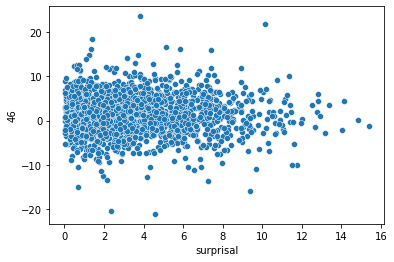

In [75]:
import seaborn as sns
sns.scatterplot(data=erp_df, x="surprisal", y="46")

---

In [8]:
import mne

In [9]:
m2 = mne.io.read_raw_eeglab("/om/data/public/language-eeg/frank2015/EEG02.set", preload=True)
m1 = mne.io.read_raw_eeglab("/om/data/public/language-eeg/frank2015/EEG01.set", preload=True)

# NB EEG data recorded during sentence boundaries is marked as NaN in the raw data. this is awkward. maybe best to split data at NaN boundaries, then rebuild with `concatenate_raw` (so boundaries don't get messed up during epoching)

In [33]:
print(sorted(m1.ch_names))

['1', '10', '12', '14', '16', '18', '21', '22', '24', '25', '26', '29', '30', '31', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '8', 'HEOG', 'VEOG']


In [23]:
montage = mne.channels.make_standard_montage("easycap-M10")

Creating RawArray with float64 data, n_channels=61, n_times=1
    Range : 0 ... 0 =      0.000 ...     0.000 secs
Ready.


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-q0i5gdsr because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Matplotlib is building the font cache; this may take a moment.


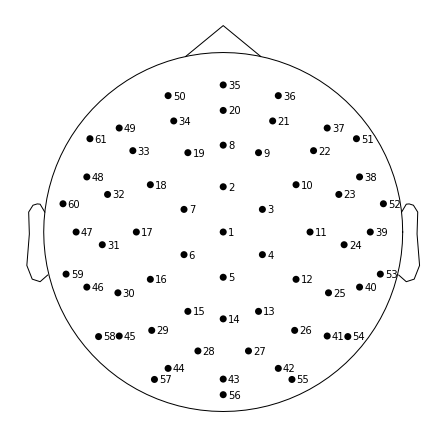

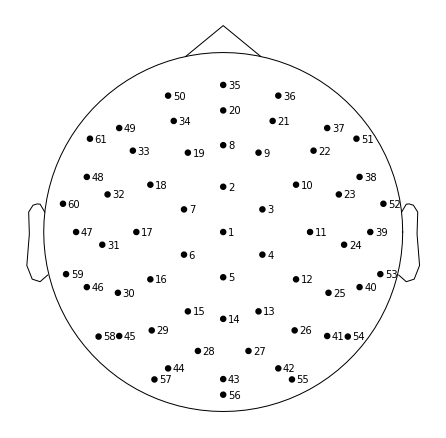

In [25]:
montage.plot()

In [20]:
m1.info["highpass"] = 0.25

/tmp/ipykernel_30720/2560219122.py:1: DeprecationWarning: highpass cannot be set directly. Please use methods inst.filter() instead. This warning will turn into an error after 0.24
  m1.info["highpass"] = 0.25


In [4]:
m1_mat = m1.get_data()

In [5]:
import numpy as np

# Get indices into raw EEG data where stimulus presentation begins
# (i.e. index i s.t. data[i] is not NaN and data[i - 1] is NaN)
presentation_begins = np.where(~np.isnan(m1_mat[0, 1:]) & np.isnan(m1_mat[0, :-1]))[0]
presentation_ends = np.where(~np.isnan(m1_mat[0, :-1]) & np.isnan(m1_mat[0, 1:]))[0]
presentation_spans = np.array(list(zip(presentation_begins, presentation_ends)))
presentation_spans

array([[  2430,   4106],
       [  5313,   7780],
       [  8827,  11202],
       [ 12394,  13888],
       [ 14702,  17020],
       [ 17863,  20042],
       [ 21141,  22453],
       [ 23831,  25864],
       [ 27077,  28917],
       [ 29928,  30876],
       [ 31483,  32791],
       [ 33499,  35863],
       [ 36463,  37615],
       [ 39271,  40237],
       [ 41126,  42231],
       [ 43288,  44789],
       [ 45539,  47689],
       [ 48335,  49612],
       [ 50918,  52405],
       [ 54093,  55202],
       [ 56598,  58088],
       [ 58898,  61081],
       [ 62926,  65119],
       [ 65851,  68159],
       [ 70139,  71994],
       [ 74335,  76528],
       [ 77559,  78939],
       [ 79871,  81208],
       [ 82522,  83819],
       [ 85615,  87101],
       [ 88308,  89791],
       [ 90527,  92870],
       [ 94009,  96362],
       [ 97890,  99919],
       [100997, 102801],
       [103887, 105934],
       [107483, 108609],
       [109769, 110725],
       [111585, 113589],
       [114179, 115298],


In [6]:
# Sanity check: no overlapping spans.
assert not (presentation_spans[:-1, 1] > presentation_spans[1:, 0]).any()

In [14]:
m1.n_times

638420

In [30]:
np.concatenate([m1_mat[:, begin:end] for begin, end in presentation_spans], axis=1).shape

(34, 355038)

In [18]:
m1_mat[:, presentation_spans].shape

(34, 205, 2)

In [42]:
m1.info["sfreq"]

250.0

In [32]:
m1.annotations.onset

array([   9.824,   10.496,   11.236, ..., 2544.24 , 2544.928, 2545.668])

In [ ]:
m1_events, m1_event_id = mne.events_from_annotations(m1)
m1_epochs = mne.Epochs(m1, events=m1_events, event_id=m1_event_id, preload=True)
m1_epochs.average().plot()

In [48]:
import pandas as pd
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2], keys=["s1", "s2"], names=["abc", "def"])

abc  def
s1   0      a
     1      b
s2   0      c
     1      d
dtype: object

In [49]:
import scipy.io

In [59]:
stim_data = scipy.io.loadmat("/om/data/public/language-eeg/frank2015/stimuli_erp.mat", simplify_cells=True)

In [90]:
stim_df = pd.concat([pd.DataFrame({"word": sent}) for sent in stim_data["sentences"]],
                    keys=np.arange(len(stim_data["sentences"])) + 1, names=["sentence_idx", "word_idx"])
stim_df

word
sentence_idx word_idx        
1            0              I
             1         cannot
             2           tell
             3            you
             4          more.
...                       ...
205          7            his
             8           hand
             9         behind
             10           his
             11         back.

[1931 rows x 1 columns]

In [79]:
annotations_df = pd.DataFrame({"description": m1.annotations.description.astype(int), "onset": m1.annotations.onset})

,description,onset
0,155,9.824
1,2,10.496
2,3,11.236
3,4,11.924
4,5,12.720
...,...,...
1926,8,2542.860
1927,9,2543.544
1928,10,2544.240
1929,11,2544.928


In [88]:
annotations_df.loc[annotations_df.description <= 50, "word_idx"] = annotations_df.description - 1
annotations_df.loc[annotations_df.description > 50, "word_idx"] = 0
annotations_df.loc[annotations_df.description > 50, "sentence_idx"] = annotations_df.description - 50
annotations_df["sentence_idx"] = annotations_df.sentence_idx.fillna(method="ffill")
annotations_df = annotations_df.astype({"word_idx": int, "sentence_idx": int}).drop(columns=["description"])
annotations_df.head(50)

,onset,word_idx,sentence_idx
0,9.824,0,105
1,10.496,1,105
2,11.236,2,105
3,11.924,3,105
4,12.720,4,105
5,13.408,5,105
6,14.136,6,105
7,14.820,7,105
8,15.504,8,105
9,21.356,0,168


In [95]:
merged_df = pd.merge(annotations_df, stim_df, left_on=["sentence_idx", "word_idx"], right_index=True)
merged_df

,onset,word_idx,sentence_idx,word
0,9.824,0,105,He
1,10.496,1,105,heaved
2,11.236,2,105,his
3,11.924,3,105,shoulders
4,12.720,4,105,and
...,...,...,...,...
1926,2542.860,7,164,the
1927,2543.544,8,164,ones
1928,2544.240,9,164,the
1929,2544.928,10,164,others
